In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

from moabb.datasets import BI2013a

from preprocessing.power import FRMS
from preprocessing.data_processing import get_clean_epochs, Lagger

In [4]:
dataset=BI2013a()
epochs = get_clean_epochs(dataset, subjects_list=[2])

/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 504 events (all good), 0 – 1 s (baseline off), ~31.6 MB, data 

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/paradigms/base.py:350: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be

Adding metadata with 3 columns
3864 matching events found
No baseline correction applied
Dataset median value:  -1.9387869141760546e-07


In [5]:
epochs.metadata

,subject,session,run
0,2,1,2
1,2,1,2
2,2,1,2
3,2,1,2
4,2,1,2
...,...,...,...
3843,2,5,2
3844,2,5,2
3861,2,5,2
3862,2,5,2


In [6]:
epochs.metadata.session.unique()

array(['1', '6', '4', '0', '2', '3', '7', '5'], dtype=object)

In [7]:
session = "0"
epochs = epochs[epochs.metadata.session == session]
epochs

<EpochsArray | 469 events (all good), 0 – 1 s (baseline off), ~29.4 MB, data loaded, with metadata,
 'Target': 76
 'NonTarget': 393>

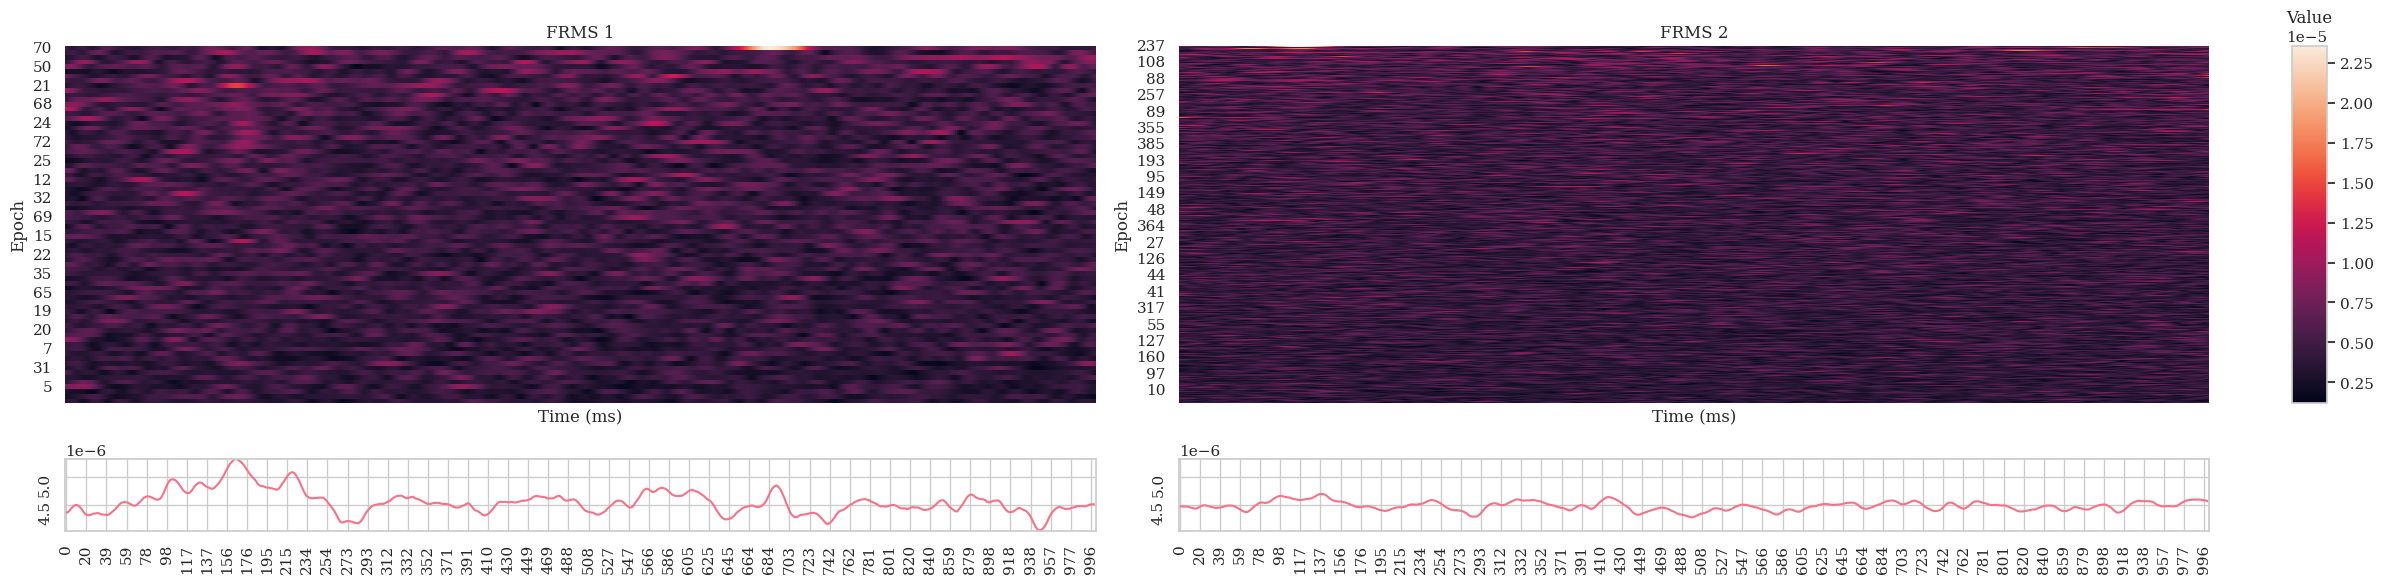

In [8]:
frms = FRMS(epochs["Target"])
frms_ntg = FRMS(epochs["NonTarget"])

frms.plot_compare(frms_ntg)

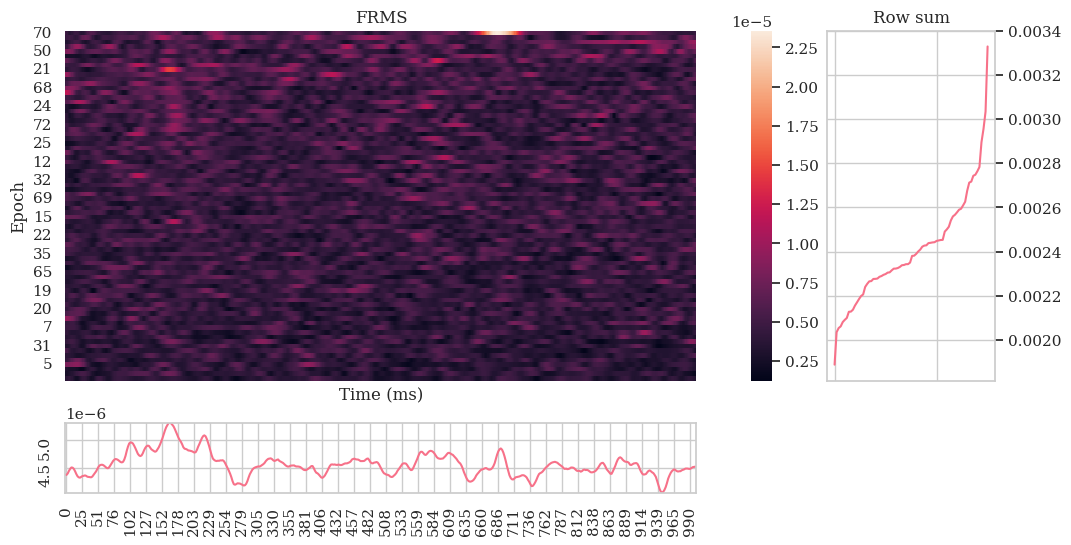

In [9]:
frms.plot()

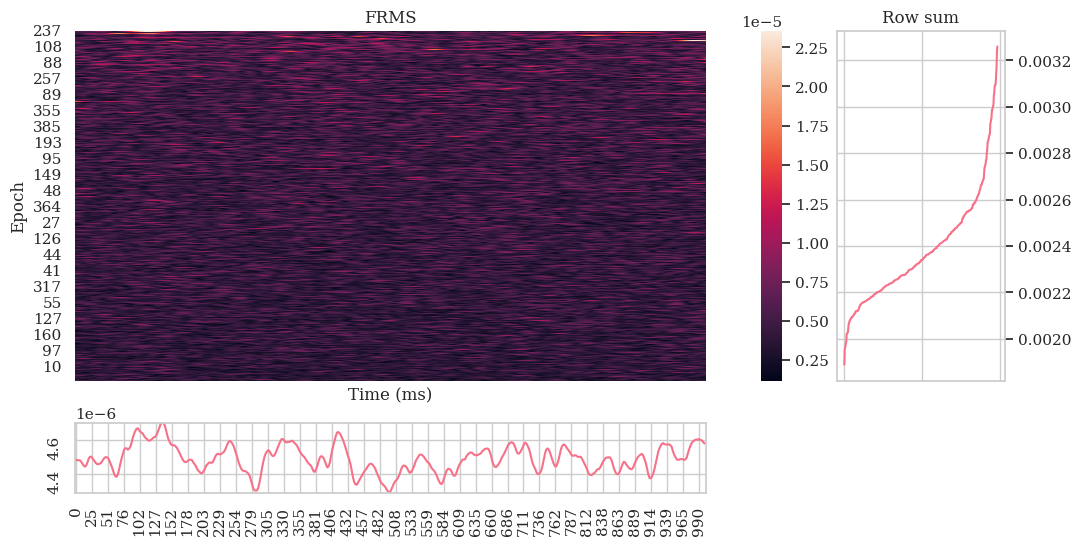

In [10]:
frms_ntg.plot()

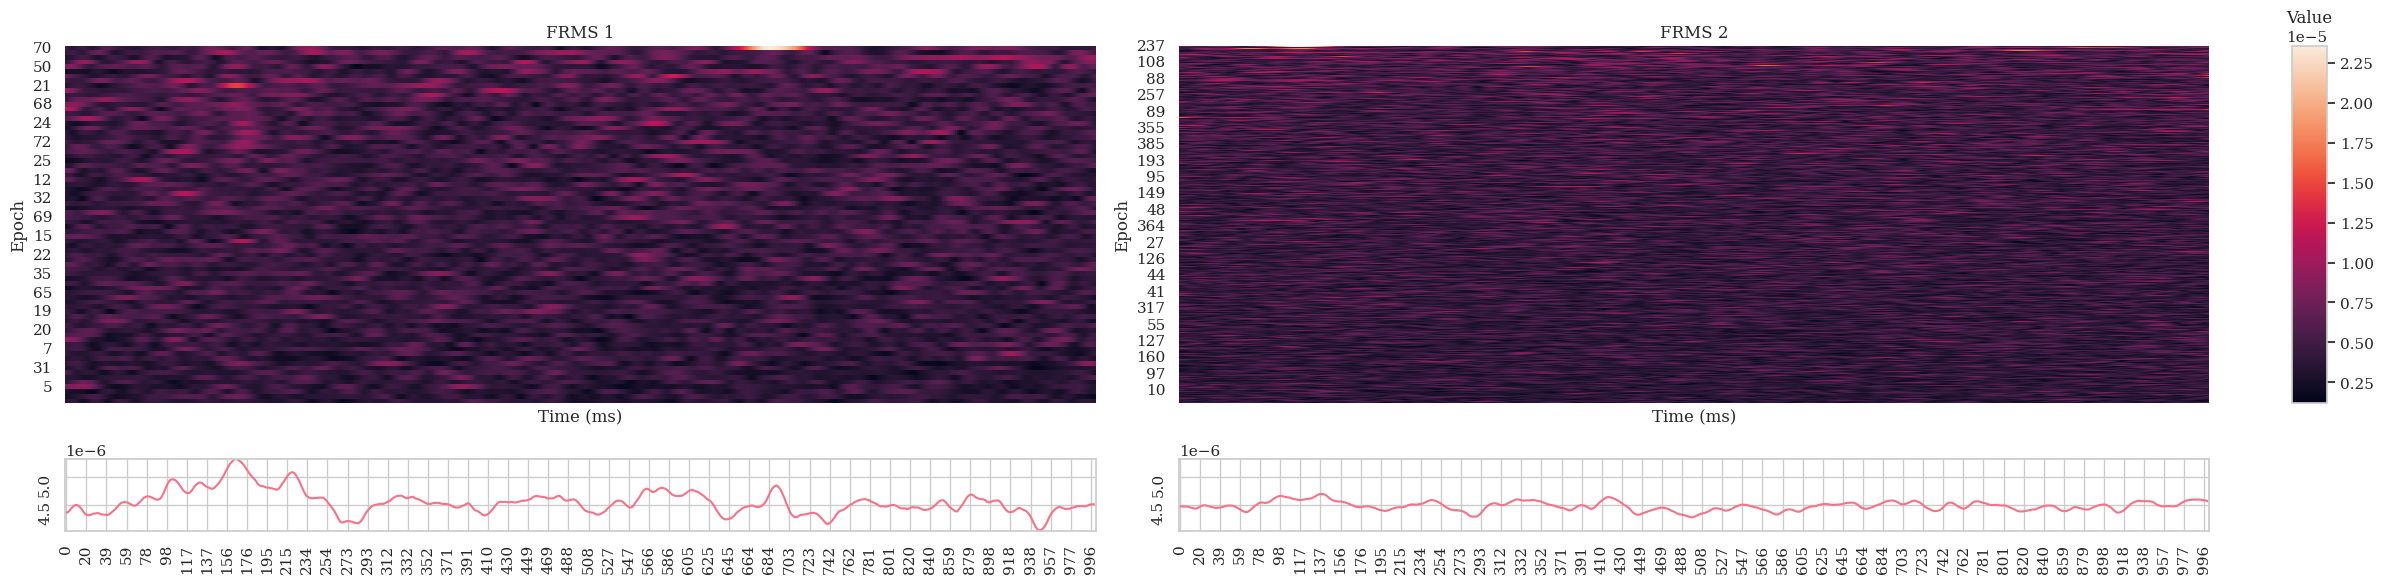

In [11]:
frms.plot_compare(second_frms=frms_ntg)

# Preprocessed data

Spatial and Temporal Filters converged.


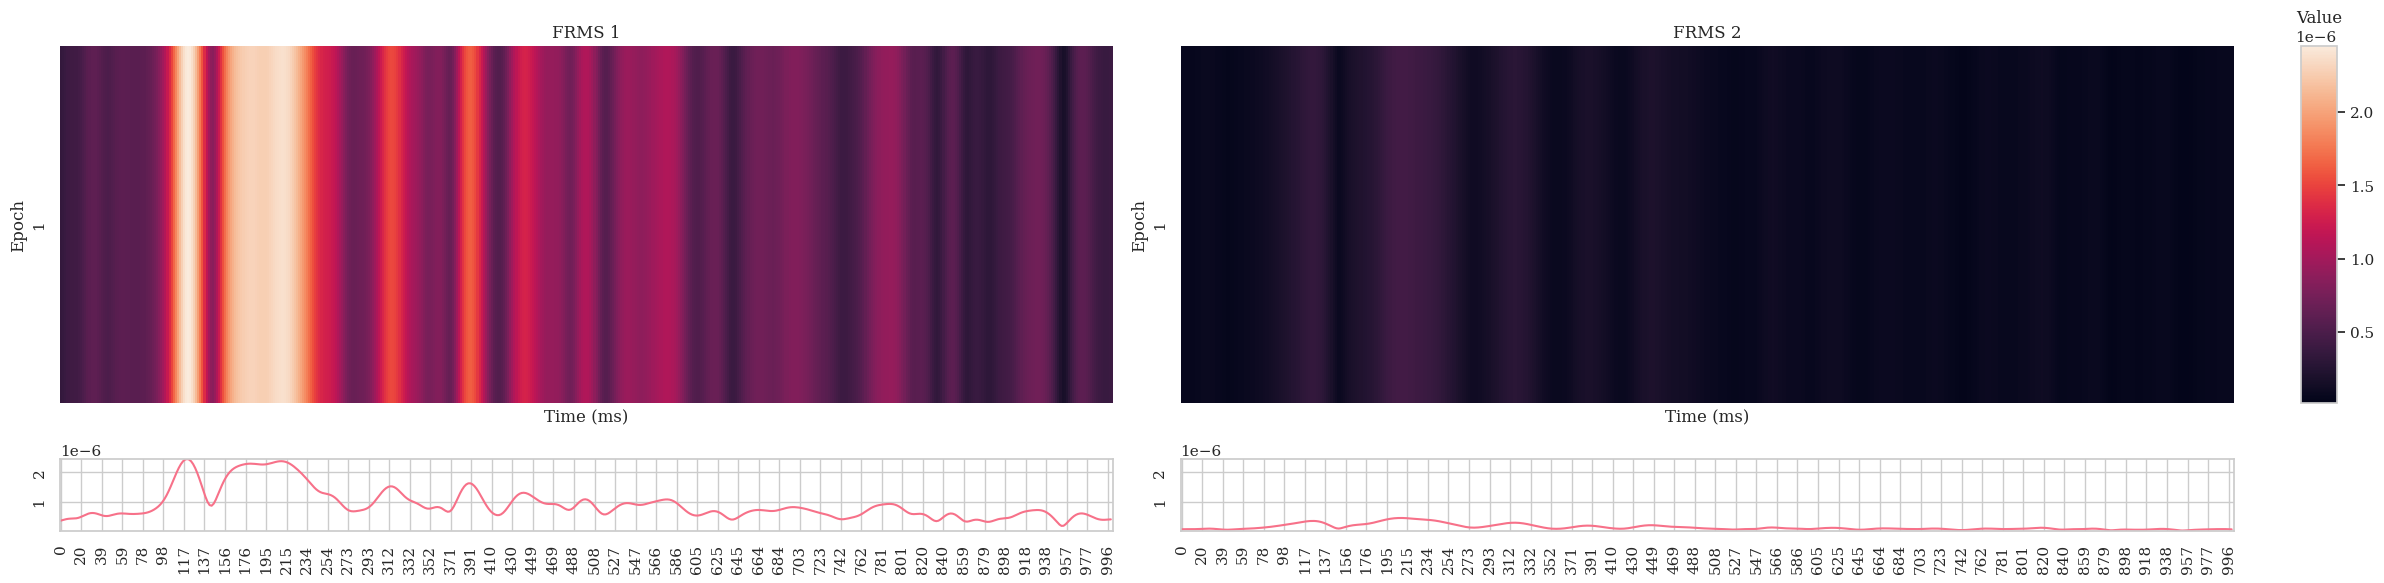

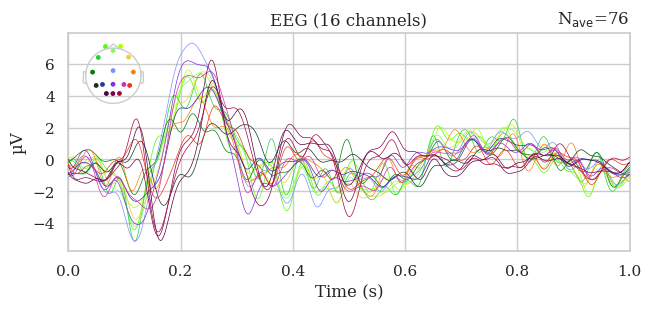

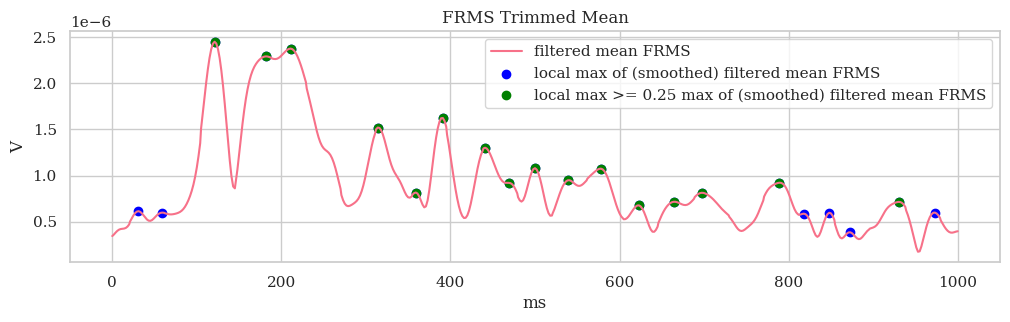

Topomaps Target and Non Target at peaks


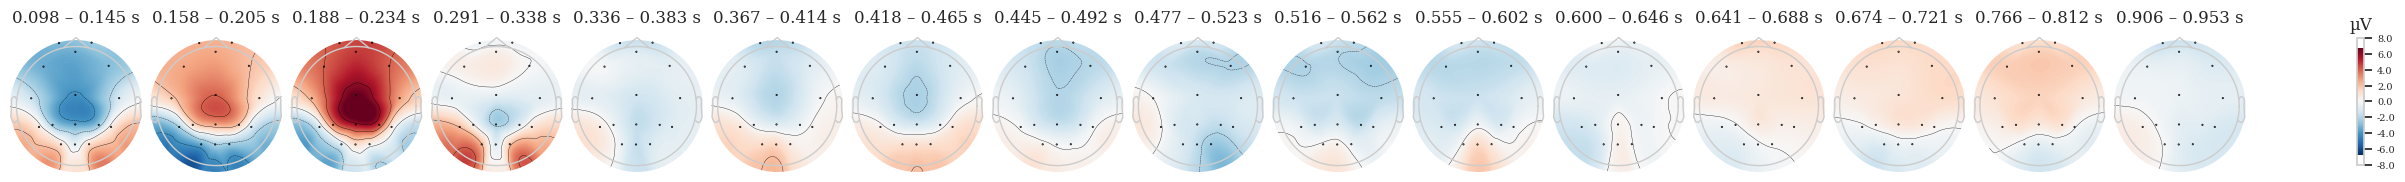

In [15]:
from preprocessing.data_processing_iterative import AltFilters

alt_filter = AltFilters(epochs, p=10)
filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms = FRMS(filtered_epochs["Target"].average())
frms_ntg = FRMS(filtered_epochs["NonTarget"].average())

frms.plot_compare(frms_ntg, show = True)

filtered_epochs["Target"].average().plot();

peaks_idx, _ = frms.peaks_idx(show=True)
print("Topomaps Target and Non Target at peaks")
peaks_times = filtered_epochs.times[peaks_idx]
filtered_epochs["Target"].average().plot_topomap(times= peaks_times, ch_type="eeg", average=0.05);

## Test another p

Spatial and Temporal Filters converged.


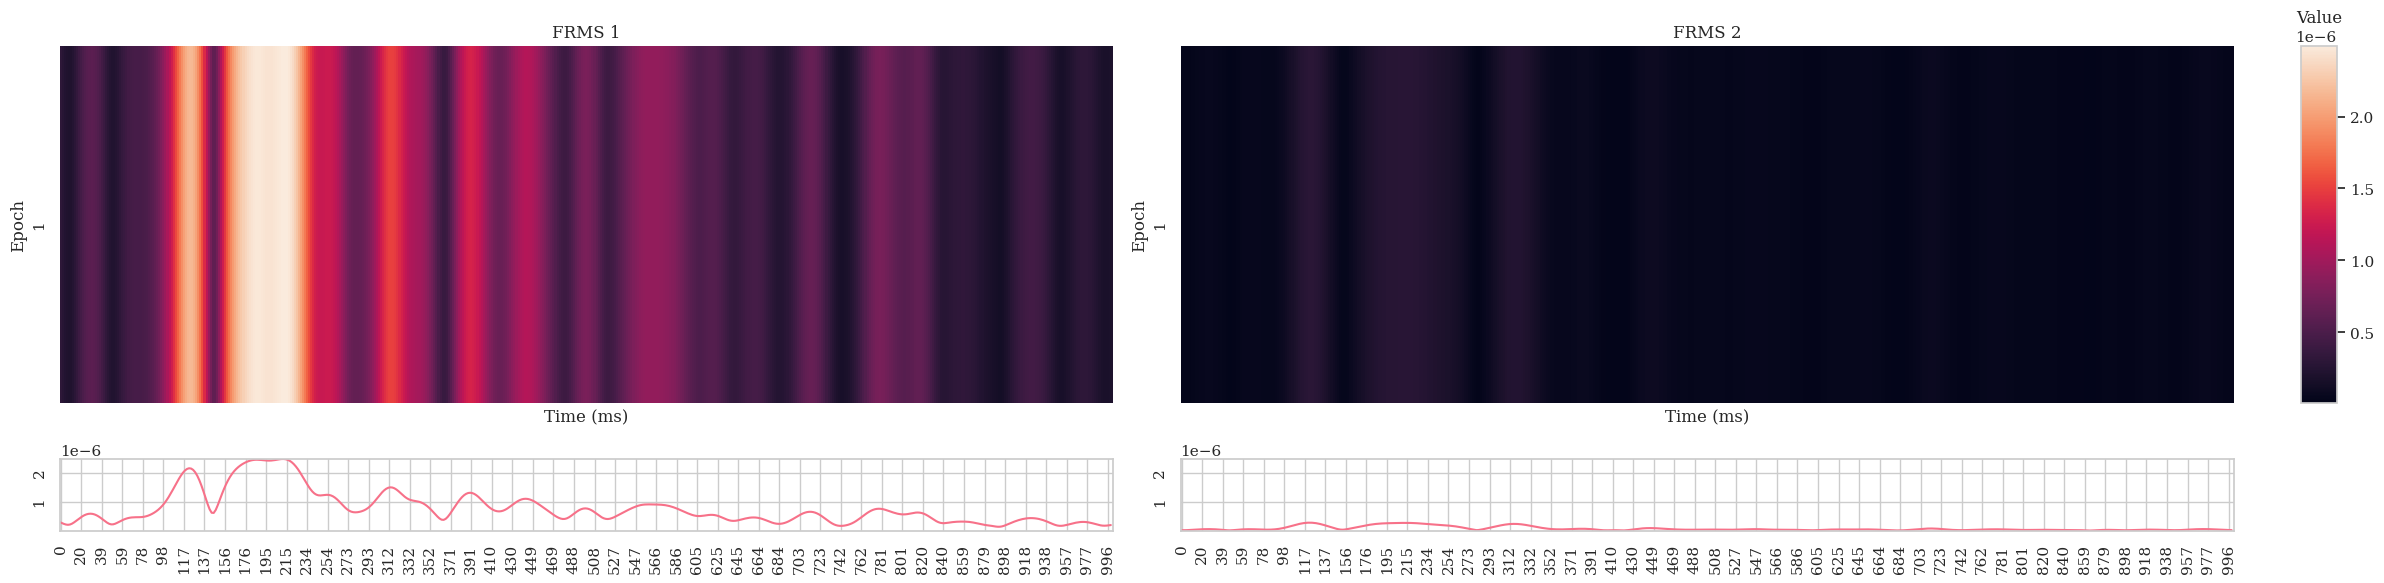

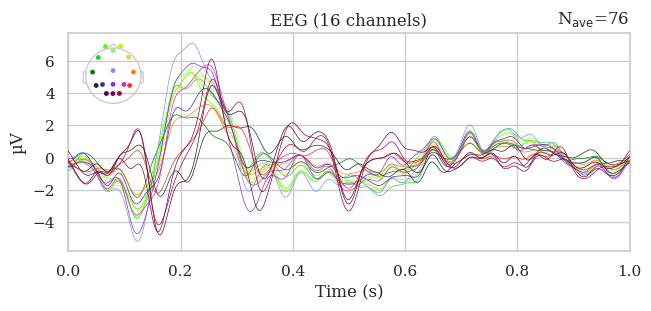

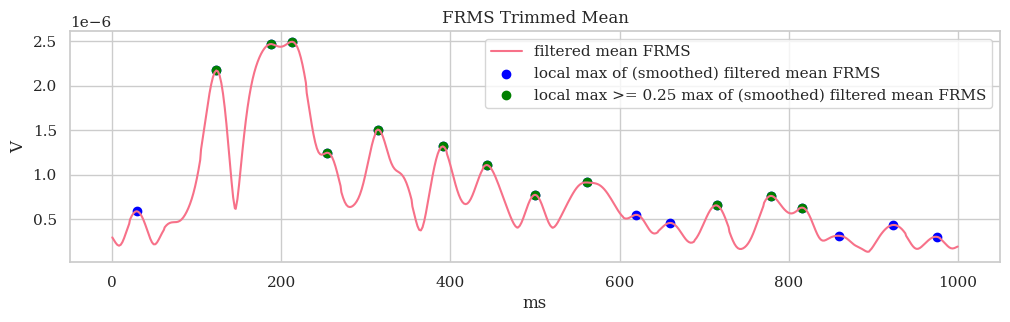

Topomaps Target and Non Target at peaks


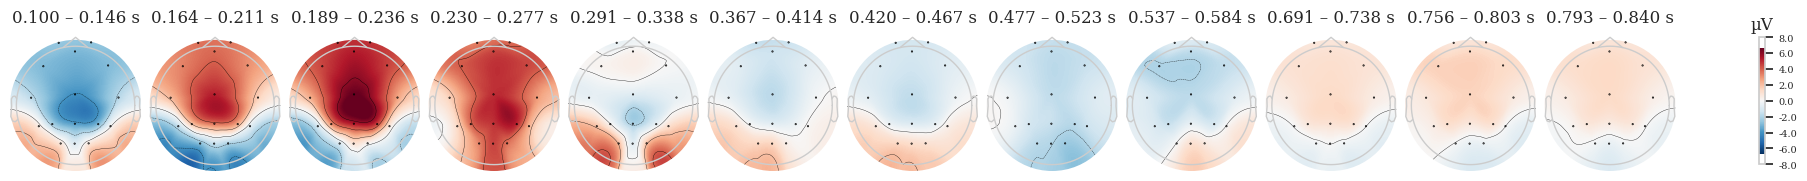

In [13]:
alt_filter = AltFilters(epochs, p=4)
filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms = FRMS(filtered_epochs["Target"].average())
frms_ntg = FRMS(filtered_epochs["NonTarget"].average())

frms.plot_compare(frms_ntg, show = True)

filtered_epochs["Target"].average().plot();

peaks_idx, _ = frms.peaks_idx(show=True)
print("Topomaps Target and Non Target at peaks")
peaks_times = filtered_epochs.times[peaks_idx]
filtered_epochs["Target"].average().plot_topomap(times= peaks_times, ch_type="eeg", average=0.05);

Spatial and Temporal Filters converged.


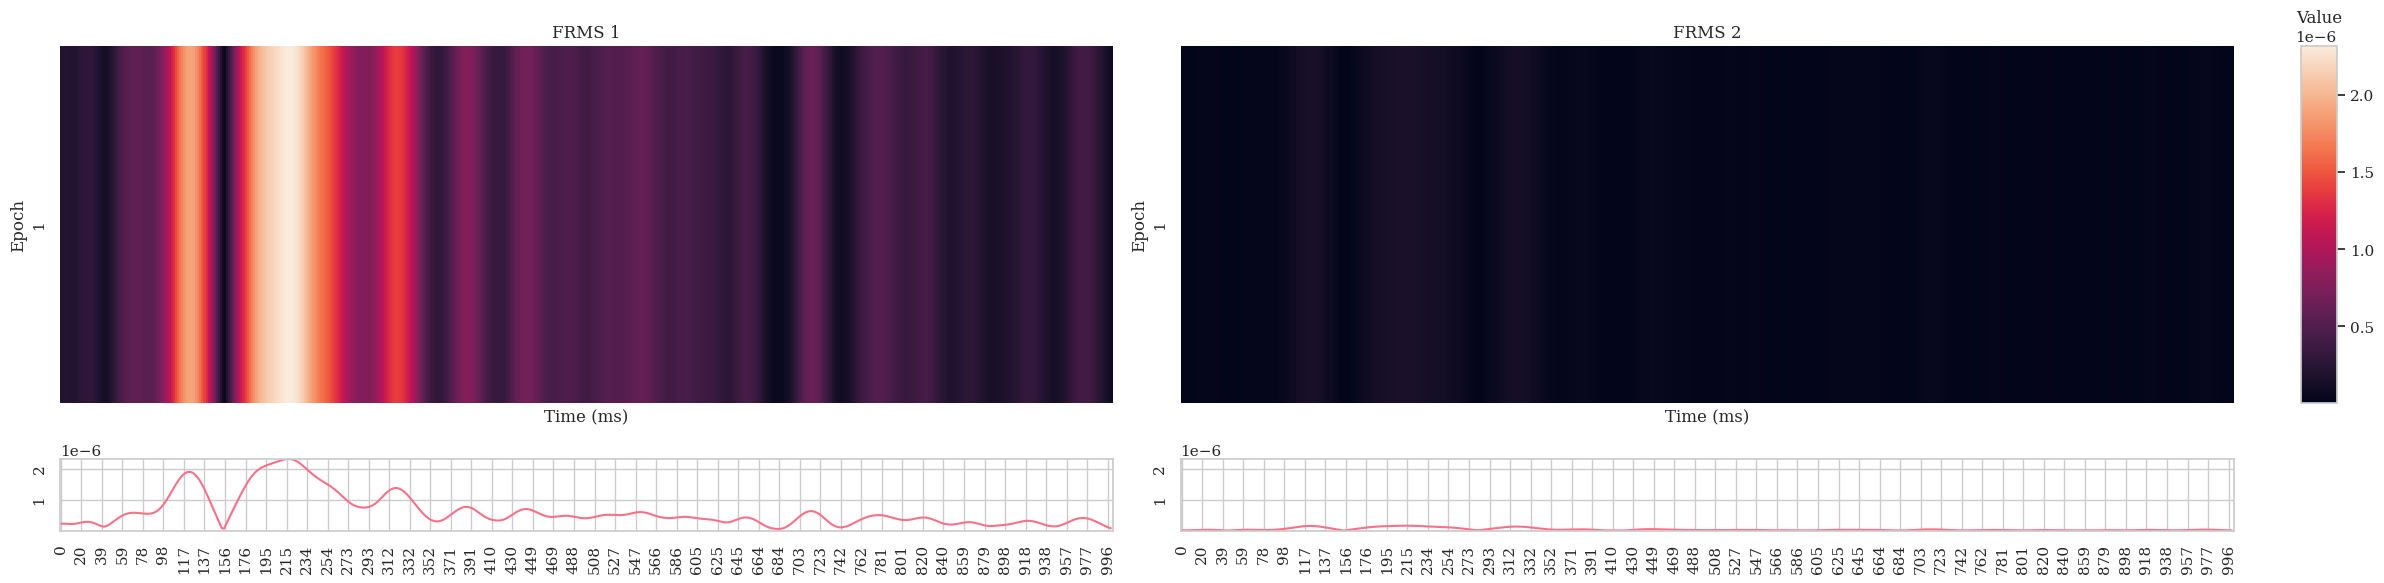

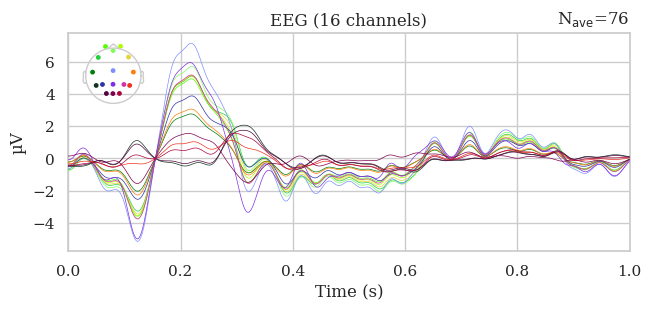

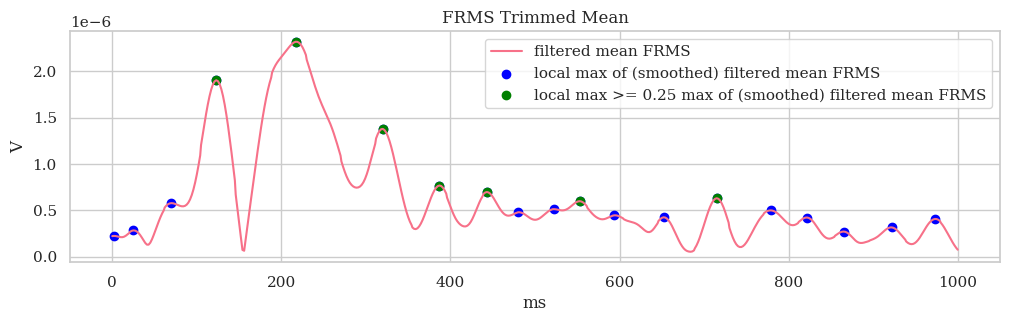

Topomaps Target and Non Target at peaks


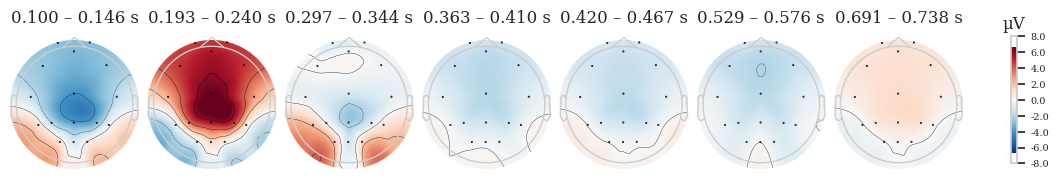

In [14]:
alt_filter = AltFilters(epochs, p=2)
filtered_epochs, _ = alt_filter.fit_and_apply(class_="Target", plot_it=False)

frms = FRMS(filtered_epochs["Target"].average())
frms_ntg = FRMS(filtered_epochs["NonTarget"].average())

frms.plot_compare(frms_ntg, show = True)

filtered_epochs["Target"].average().plot();

peaks_idx, _ = frms.peaks_idx(show=True)
print("Topomaps Target and Non Target at peaks")
peaks_times = filtered_epochs.times[peaks_idx]
filtered_epochs["Target"].average().plot_topomap(times= peaks_times, ch_type="eeg", average=0.05);